# FIFA 2019 EXPLORATORY DATA ANALYSIS

![title](fifa-19-cover-champions-edition.jpg)

*In this project, I will be performing exploratory data analysis on the FIFA 2019 dataset.
This dataset is publicly available and supplied by EA Vancouver*

#### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly as py
import seaborn as sns
import plotly.graph_objs as go
import os
import warnings

In [2]:
pd.set_option('display.max_columns', 100)

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5.0,4.0,4.0,Medium/ Medium,Messi,Yes,RF,10.0,"Jul 1, 2004",NaN,2021,5'7,159lbs,88+2,88+2,88+2,92+2,93+2,93+2,93+2,92+2,93+2,93+2,93+2,91+2,84+2,84+2,84+2,91+2,64+2,61+2,61+2,61+2,64+2,59+2,47+2,47+2,47+2,59+2,84.0,95.0,70.0,90.0,86.0,97.0,93.0,94.0,87.0,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,https://cdn.sofifa.org/teams/2/light/45.png,€77M,€405K,2228,Right,5.0,4.0,5.0,High/ Low,C. Ronaldo,Yes,ST,7.0,"Jul 10, 2018",NaN,2022,6'2,183lbs,91+3,91+3,91+3,89+3,90+3,90+3,90+3,89+3,88+3,88+3,88+3,88+3,81+3,81+3,81+3,88+3,65+3,61+3,61+3,61+3,65+3,61+3,53+3,53+3,53+3,61+3,84.0,94.0,89.0,81.0,87.0,88.0,81.0,76.0,77.0,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,https://cdn.sofifa.org/teams/2/light/73.png,€118.5M,€290K,2143,Right,5.0,5.0,5.0,High/ Medium,Neymar,Yes,LW,10.0,"Aug 3, 2017",NaN,2022,5'9,150lbs,84+3,84+3,84+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,89+3,88+3,81+3,81+3,81+3,88+3,65+3,60+3,60+3,60+3,65+3,60+3,47+3,47+3,47+3,60+3,79.0,87.0,62.0,84.0,84.0,96.0,88.0,87.0,78.0,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,https://cdn.sofifa.org/teams/2/light/11.png,€72M,€260K,1471,Right,4.0,3.0,1.0,Medium/ Medium,Lean,Yes,GK,1.0,"Jul 1, 2011",NaN,2020,6'4,168lbs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.0,13.0,21.0,50.0,13.0,18.0,21.0,19.0,51.0,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,https://cdn.sofifa.org/teams/2/light/10.png,€102M,€355K,2281,Right,4.0,5.0,4.0,High/ High,Normal,Yes,RCM,7.0,"Aug 30, 2015",NaN,2023,5'11,154lbs,82+3,82+3,82+3,87+3,87+3,87+3,87+3,87+3,88+3,88+3,88+3,88+3,87+3,87+3,87+3,88+3,77+3,77+3,77+3,77+3,77+3,73+3,66+3,66+3,66+3,73+3,93.0,82.0,55.0,92.0,82.0,86.0,85.0,83.0,91.0,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


lets plot a quick histogram of all the data

C:\Users\Timileyin\AppData\Local\Temp\ipykernel_21632\4248261866.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax=ax)


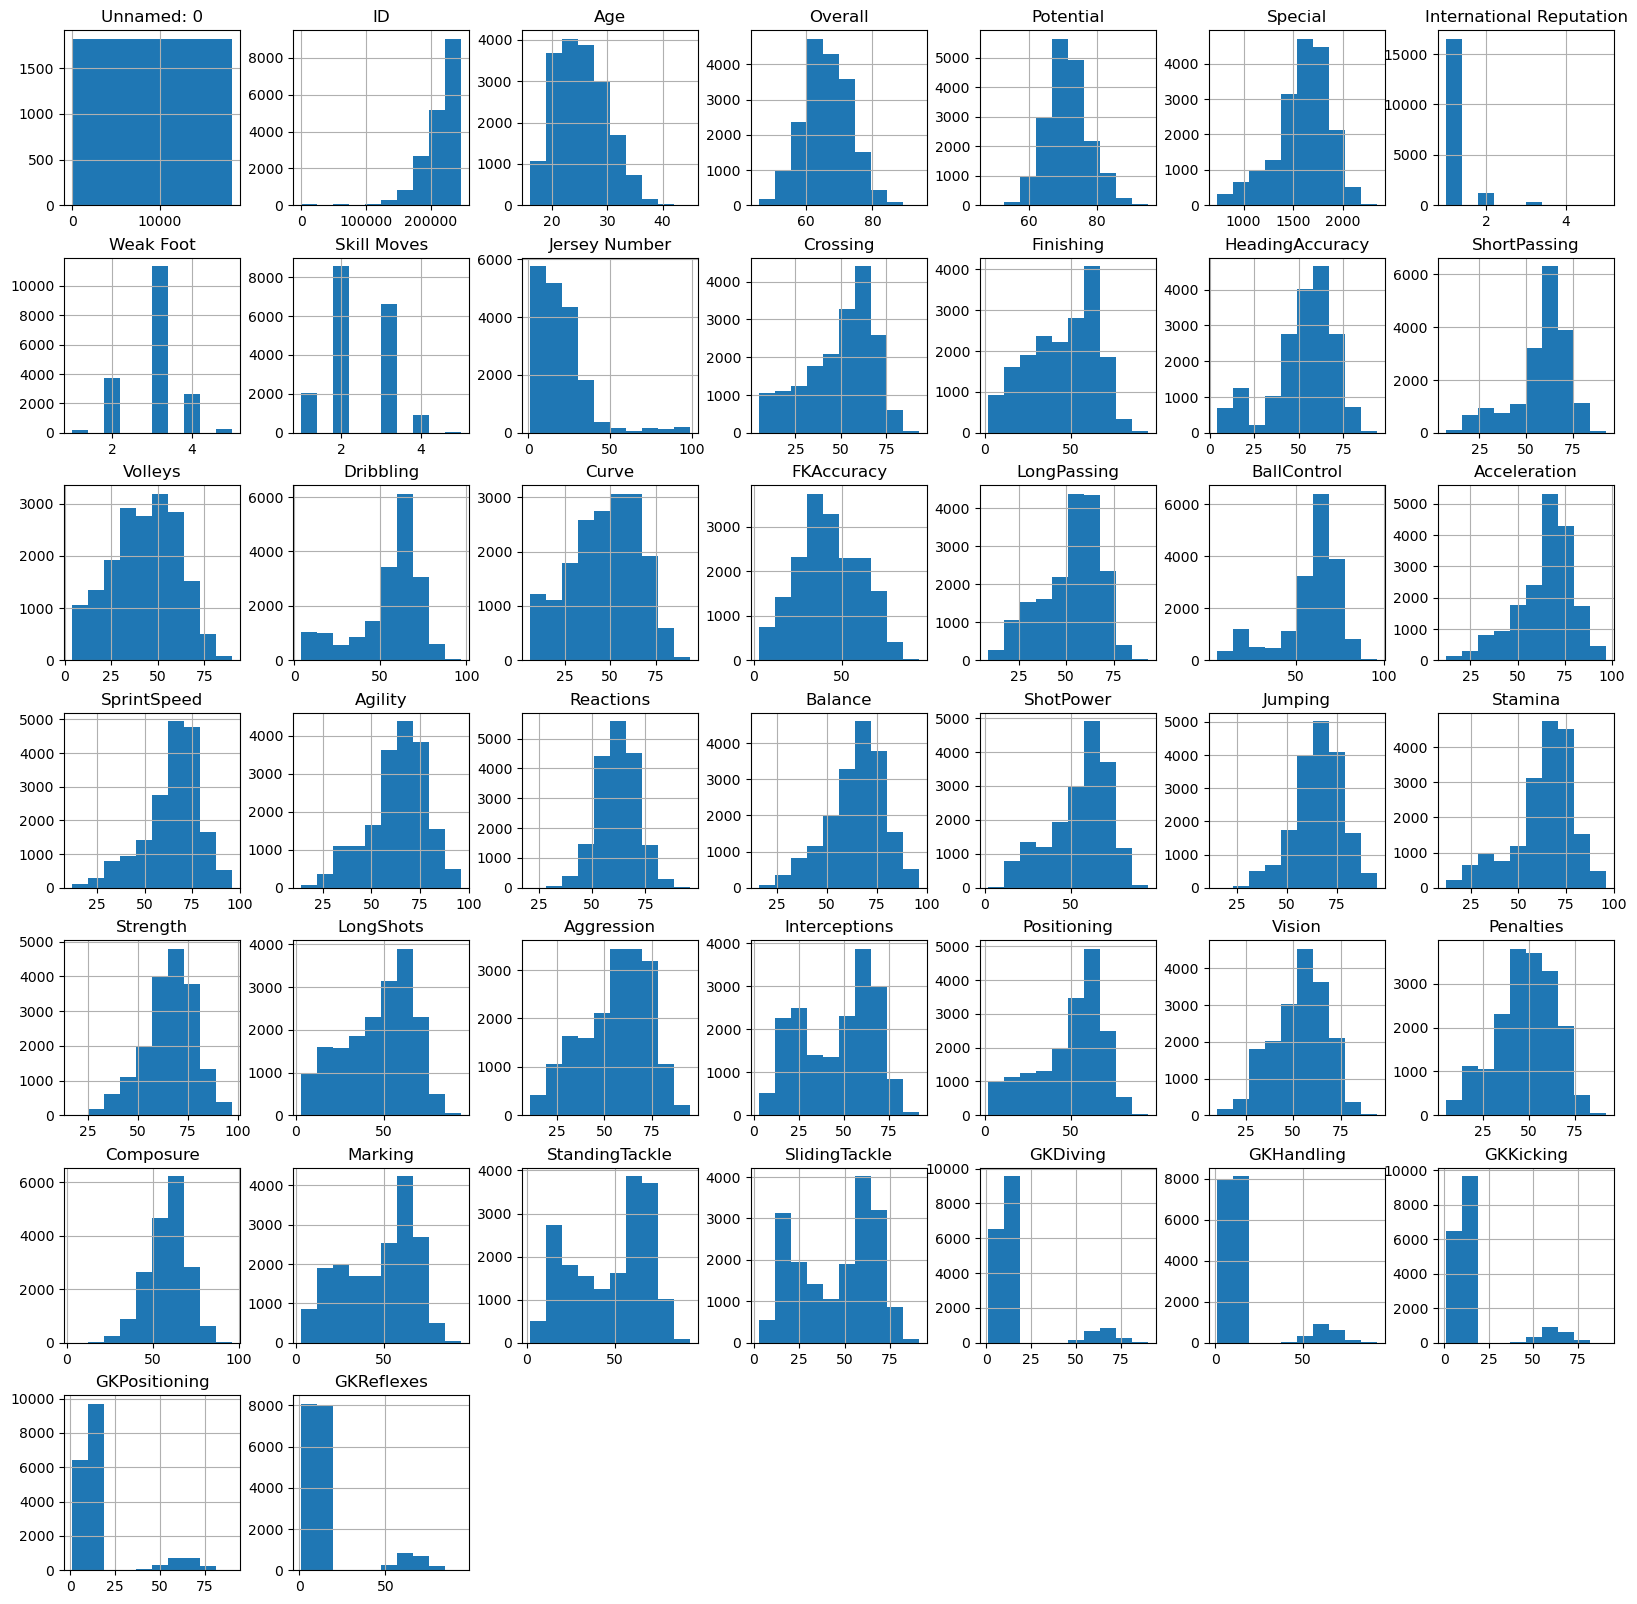

In [4]:

fig = plt.figure(figsize=(20, 20))
ax = fig.gca()
df.hist(ax=ax)
plt.show()

We will be selecting some important features to work with rather than the entire dataset

In [5]:
features = ['Name','Age','Overall', 
                   'Nationality', 'Flag', 'LongPassing',
                'Club', 'BallControl', 'Acceleration',
                   'SprintSpeed', 'Agility', 'Reactions', 'Balance',
                   'ShotPower', 'Jumping','Stamina', 
                   'Strength', 'LongShots', 'Aggression',
                   'Interceptions', 'Positioning', 'Vision', 
                   'Penalties', 'Composure', 'Marking',
                   'StandingTackle', 'SlidingTackle', 'GKDiving',
                   'GKHandling', 'GKKicking', 'GKPositioning',
                   'GKReflexes','Position', 'Crossing', 'Volleys', 'HeadingAccuracy', 'ShortPassing', 'FKAccuracy', 'Finishing', 'Curve', 'Dribbling']

In [6]:
data = pd.DataFrame(df, columns=features)

In [7]:
data.head()

,Name,Age,Overall,Nationality,Flag,LongPassing,Club,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position,Crossing,Volleys,HeadingAccuracy,ShortPassing,FKAccuracy,Finishing,Curve,Dribbling
0,L. Messi,31,94,Argentina,https://cdn.sofifa.org/flags/52.png,87.0,FC Barcelona,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF,84.0,86.0,70.0,90.0,94.0,95.0,93.0,97.0
1,Cristiano Ronaldo,33,94,Portugal,https://cdn.sofifa.org/flags/38.png,77.0,Juventus,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST,84.0,87.0,89.0,81.0,76.0,94.0,81.0,88.0
2,Neymar Jr,26,92,Brazil,https://cdn.sofifa.org/flags/54.png,78.0,Paris Saint-Germain,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW,79.0,84.0,62.0,84.0,87.0,87.0,88.0,96.0
3,De Gea,27,91,Spain,https://cdn.sofifa.org/flags/45.png,51.0,Manchester United,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK,17.0,13.0,21.0,50.0,19.0,13.0,21.0,18.0
4,K. De Bruyne,27,91,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,Manchester City,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM,93.0,82.0,55.0,92.0,83.0,82.0,85.0,86.0


### Players' Age Analysis

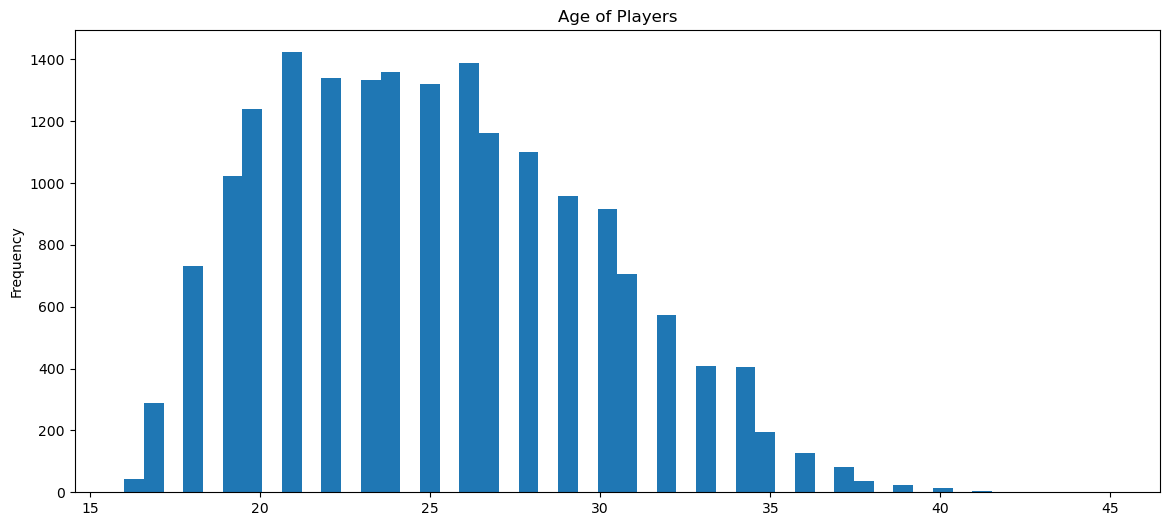

In [8]:
# histogram of age
plt.figure(figsize=(14, 6))
data['Age'].plot(kind='hist', bins=50)
plt.title("Age of Players")
plt.show()

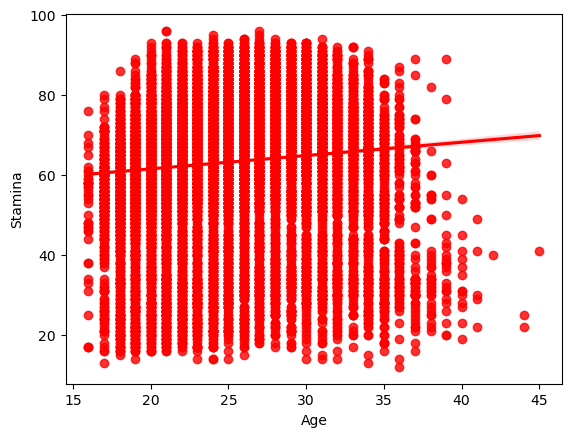

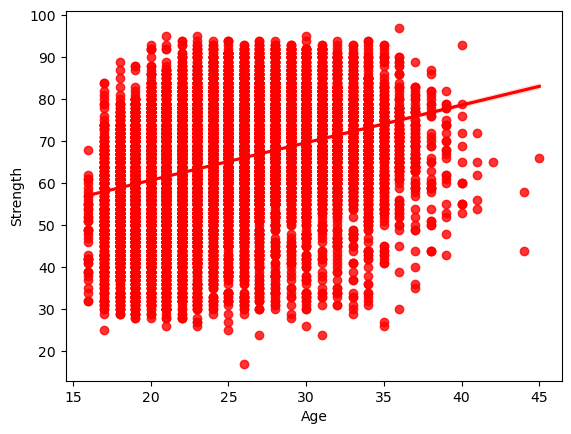

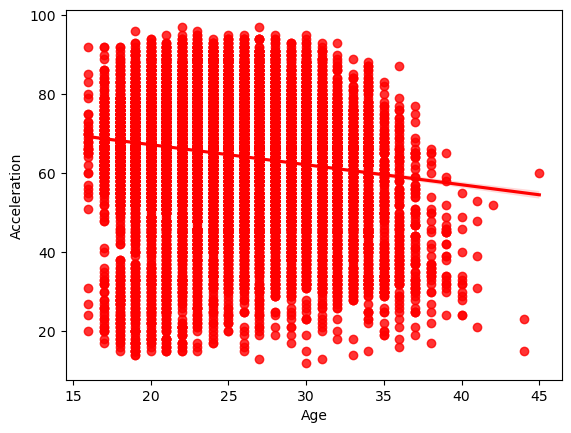

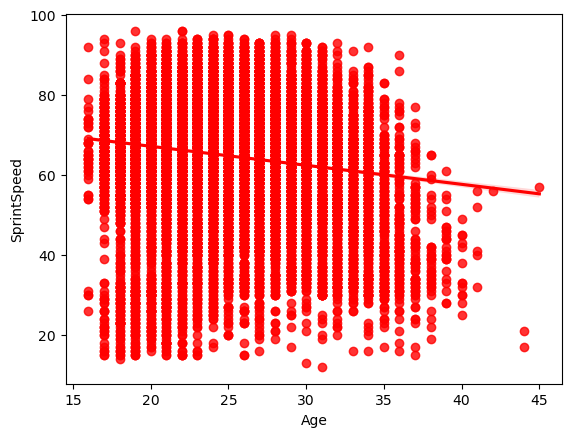

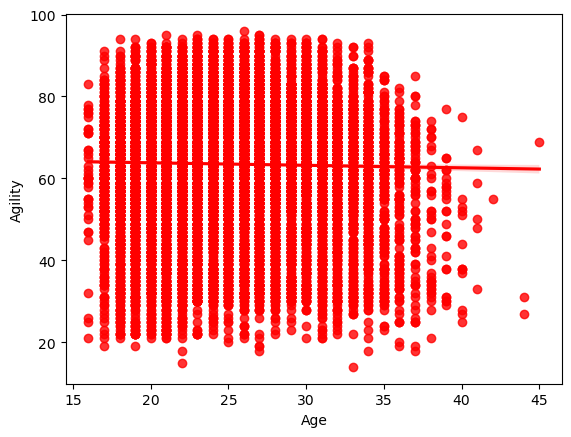

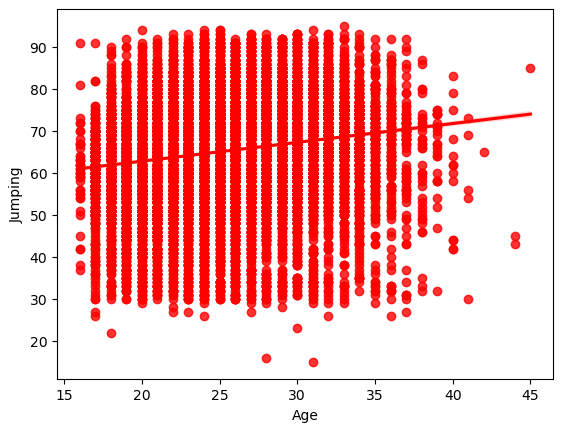

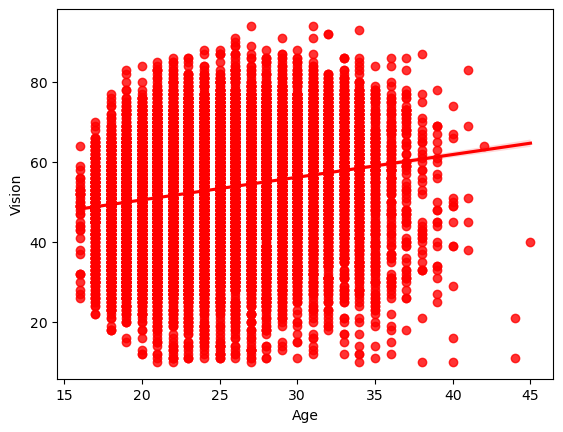

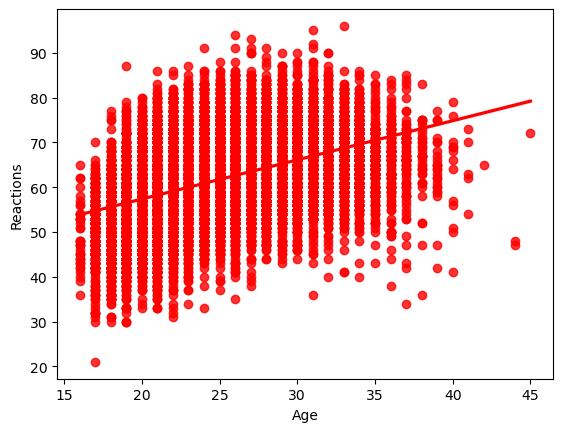

In [9]:
## lets plot to see how some players ablities are dependent on Age

abily= ['Stamina', 'Strength', 'Acceleration', 'SprintSpeed', 'Agility', 'Jumping', 'Vision', 'Reactions']

# the regression plot
for features in abily:
    plt.figure()
    sns.regplot(x= 'Age', y=features, data=data, color='red')

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


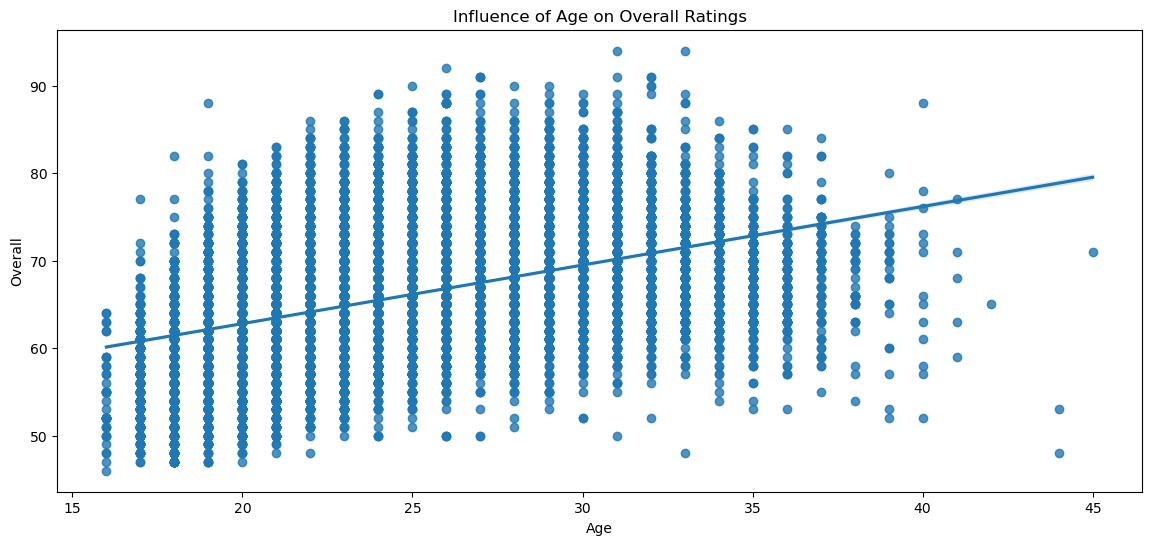

In [10]:
## How does Age affects the Overall ratings of Players
plt.figure(figsize=(14, 6))
sns.regplot(data['Age'], data['Overall'])
plt.title('Influence of Age on Overall Ratings')
plt.show()

In [11]:
# lets find the oldest and youngest players and their parameters

#oldest players

data.sort_values(by = 'Age', ascending= False)[['Name', 'Club', 'Nationality', 'Overall', 'Age']].head(5)

,Name,Club,Nationality,Overall,Age
4741,O. Pérez,Pachuca,Mexico,71,45
18183,K. Pilkington,Cambridge United,England,48,44
17726,T. Warner,Accrington Stanley,Trinidad & Tobago,53,44
10545,S. Narazaki,Nagoya Grampus,Japan,65,42
7225,C. Muñoz,CD Universidad de Concepción,Argentina,68,41


In [12]:
# Youngest players
data.sort_values(by = 'Age', ascending= True)[['Name', 'Club', 'Nationality', 'Overall', 'Age']].head(5)

,Name,Club,Nationality,Overall,Age
18206,G. Nugent,Tranmere Rovers,England,46,16
17743,J. Olstad,Sarpsborg 08 FF,Norway,52,16
13293,H. Massengo,AS Monaco,France,62,16
16081,J. Italiano,Perth Glory,Australia,58,16
18166,N. Ayéva,Örebro SK,Sweden,48,16


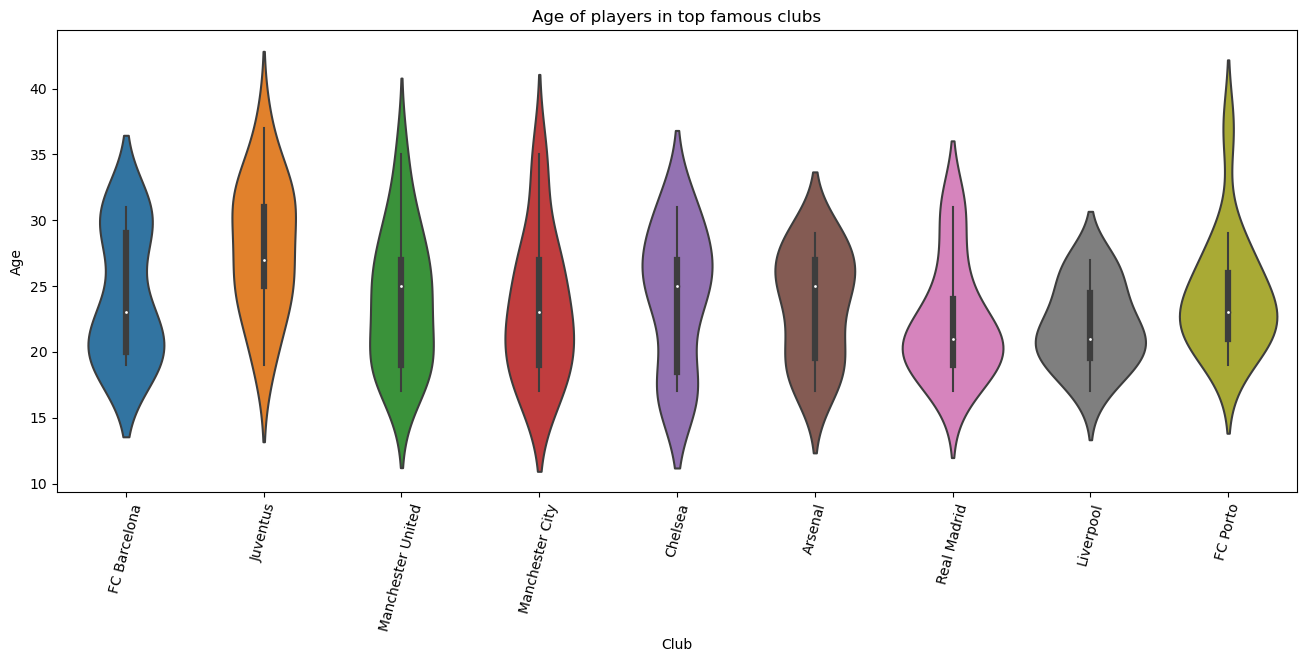

In [17]:
# lets find the age of popular players in popular clubs

clubs = ['Chelsea', 'Liverpool', 'Real Madrid', 'Arsenal', 'FC Barcelona',
         'FC Porto', 'Juventus', 'AC Milan', 'Manchester City', 'Manchester United']

agedf = data.loc[data['Club'].isin(clubs) & data['Age']]

plt.figure(figsize=(16, 6))
sns.violinplot(x='Club', y='Age', data=agedf)
plt.title("Age of players in top famous clubs")
plt.xticks(rotation= 75)
plt.show() 

In [18]:
# Age distribution in top countries

#top countries
data['Nationality'].value_counts().head(10)

England        1662
Germany        1198
Spain          1072
Argentina       937
France          914
Brazil          827
Italy           702
Colombia        618
Japan           478
Netherlands     453
Name: Nationality, dtype: int64

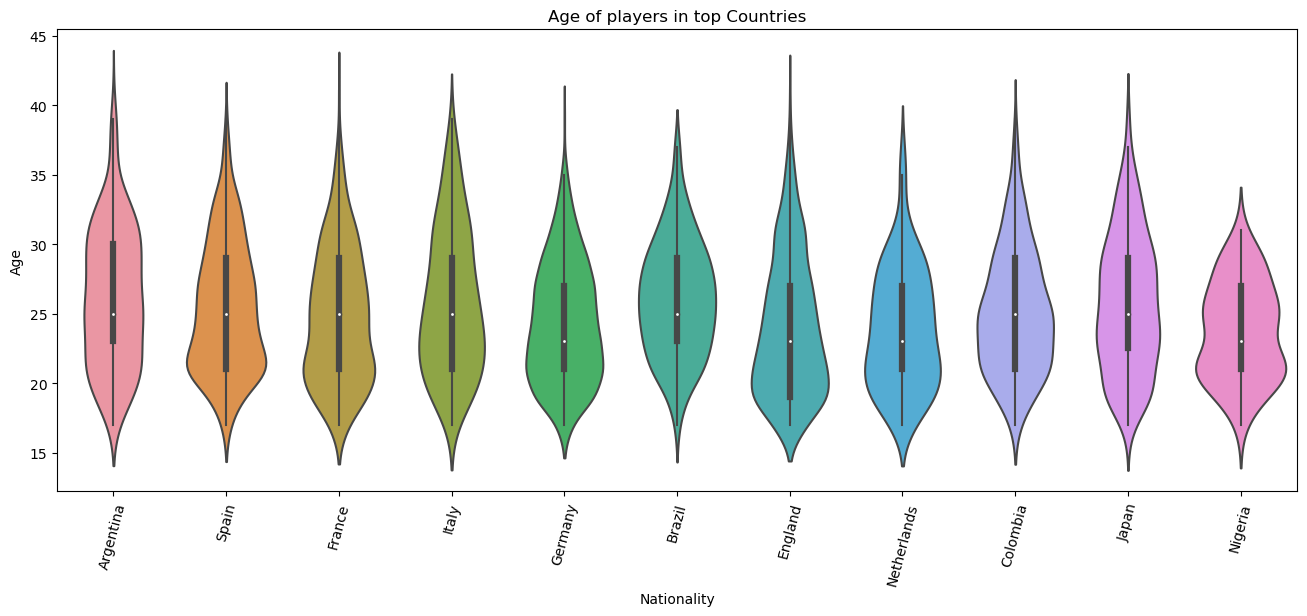

In [20]:
country = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
           'Colombia', 'Japan', 'Netherlands', 'Nigeria']

Ntnagedf = data.loc[data['Nationality'].isin(country) & data['Age']]

plt.figure(figsize=(16, 6))
sns.violinplot(x='Nationality', y='Age', data=Ntnagedf)
plt.title("Age of players in top Countries")
plt.xticks(rotation= 75)
plt.show() 

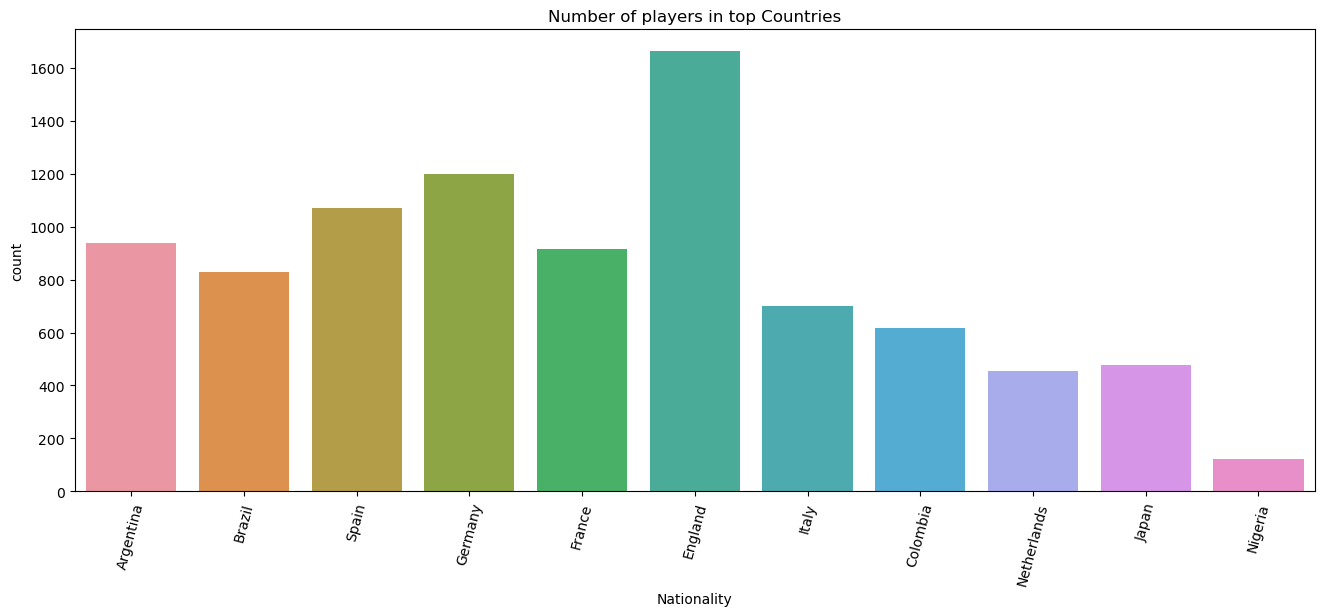

In [25]:
# plot of total numbers of players according to these countries

country = ['England', 'Germany', 'Spain', 'Argentina', 'France', 'Brazil', 'Italy',
           'Colombia', 'Japan', 'Netherlands', 'Nigeria']

plt.figure(figsize=(16, 6))
sns.countplot(x='Nationality', data=data[data['Nationality'].isin(country)])
plt.title("Number of players in top Countries")
plt.xticks(rotation= 75)
plt.show() 

#### Players Analysis

In [28]:
df_topplayers = pd.DataFrame.copy(data.sort_values(by = 'Overall', ascending=False).head(15))

df_topplayers

,Name,Age,Overall,Nationality,Flag,LongPassing,Club,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position,Crossing,Volleys,HeadingAccuracy,ShortPassing,FKAccuracy,Finishing,Curve,Dribbling
0,L. Messi,31,94,Argentina,https://cdn.sofifa.org/flags/52.png,87.0,FC Barcelona,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF,84.0,86.0,70.0,90.0,94.0,95.0,93.0,97.0
1,Cristiano Ronaldo,33,94,Portugal,https://cdn.sofifa.org/flags/38.png,77.0,Juventus,94.0,89.0,91.0,87.0,96.0,70.0,95.0,95.0,88.0,79.0,93.0,63.0,29.0,95.0,82.0,85.0,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,ST,84.0,87.0,89.0,81.0,76.0,94.0,81.0,88.0
2,Neymar Jr,26,92,Brazil,https://cdn.sofifa.org/flags/54.png,78.0,Paris Saint-Germain,95.0,94.0,90.0,96.0,94.0,84.0,80.0,61.0,81.0,49.0,82.0,56.0,36.0,89.0,87.0,81.0,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,LW,79.0,84.0,62.0,84.0,87.0,87.0,88.0,96.0
3,De Gea,27,91,Spain,https://cdn.sofifa.org/flags/45.png,51.0,Manchester United,42.0,57.0,58.0,60.0,90.0,43.0,31.0,67.0,43.0,64.0,12.0,38.0,30.0,12.0,68.0,40.0,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,GK,17.0,13.0,21.0,50.0,19.0,13.0,21.0,18.0
4,K. De Bruyne,27,91,Belgium,https://cdn.sofifa.org/flags/7.png,91.0,Manchester City,91.0,78.0,76.0,79.0,91.0,77.0,91.0,63.0,90.0,75.0,91.0,76.0,61.0,87.0,94.0,79.0,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,RCM,93.0,82.0,55.0,92.0,83.0,82.0,85.0,86.0
5,E. Hazard,27,91,Belgium,https://cdn.sofifa.org/flags/7.png,83.0,Chelsea,94.0,94.0,88.0,95.0,90.0,94.0,82.0,56.0,83.0,66.0,80.0,54.0,41.0,87.0,89.0,86.0,91.0,34.0,27.0,22.0,11.0,12.0,6.0,8.0,8.0,LF,81.0,80.0,61.0,89.0,79.0,84.0,83.0,95.0
6,L. Modrić,32,91,Croatia,https://cdn.sofifa.org/flags/10.png,88.0,Real Madrid,93.0,80.0,72.0,93.0,90.0,94.0,79.0,68.0,89.0,58.0,82.0,62.0,83.0,79.0,92.0,82.0,84.0,60.0,76.0,73.0,13.0,9.0,7.0,14.0,9.0,RCM,86.0,76.0,55.0,93.0,78.0,72.0,85.0,90.0
7,L. Suárez,31,91,Uruguay,https://cdn.sofifa.org/flags/60.png,64.0,FC Barcelona,90.0,86.0,75.0,82.0,92.0,83.0,86.0,69.0,90.0,83.0,85.0,87.0,41.0,92.0,84.0,85.0,85.0,62.0,45.0,38.0,27.0,25.0,31.0,33.0,37.0,RS,77.0,88.0,77.0,82.0,84.0,93.0,86.0,87.0
8,Sergio Ramos,32,91,Spain,https://cdn.sofifa.org/flags/45.png,77.0,Real Madrid,84.0,76.0,75.0,78.0,85.0,66.0,79.0,93.0,84.0,83.0,59.0,88.0,90.0,60.0,63.0,75.0,82.0,87.0,92.0,91.0,11.0,8.0,9.0,7.0,11.0,RCB,66.0,66.0,91.0,78.0,72.0,60.0,74.0,63.0
12,D. Godín,32,90,Uruguay,https://cdn.sofifa.org/flags/60.png,70.0,Atlético Madrid,76.0,68.0,68.0,58.0,85.0,54.0,67.0,91.0,66.0,88.0,43.0,89.0,88.0,48.0,52.0,50.0,82.0,90.0,89.0,89.0,6.0,8.0,15.0,5.0,15.0,CB,55.0,47.0,92.0,79.0,51.0,42.0,49.0,53.0


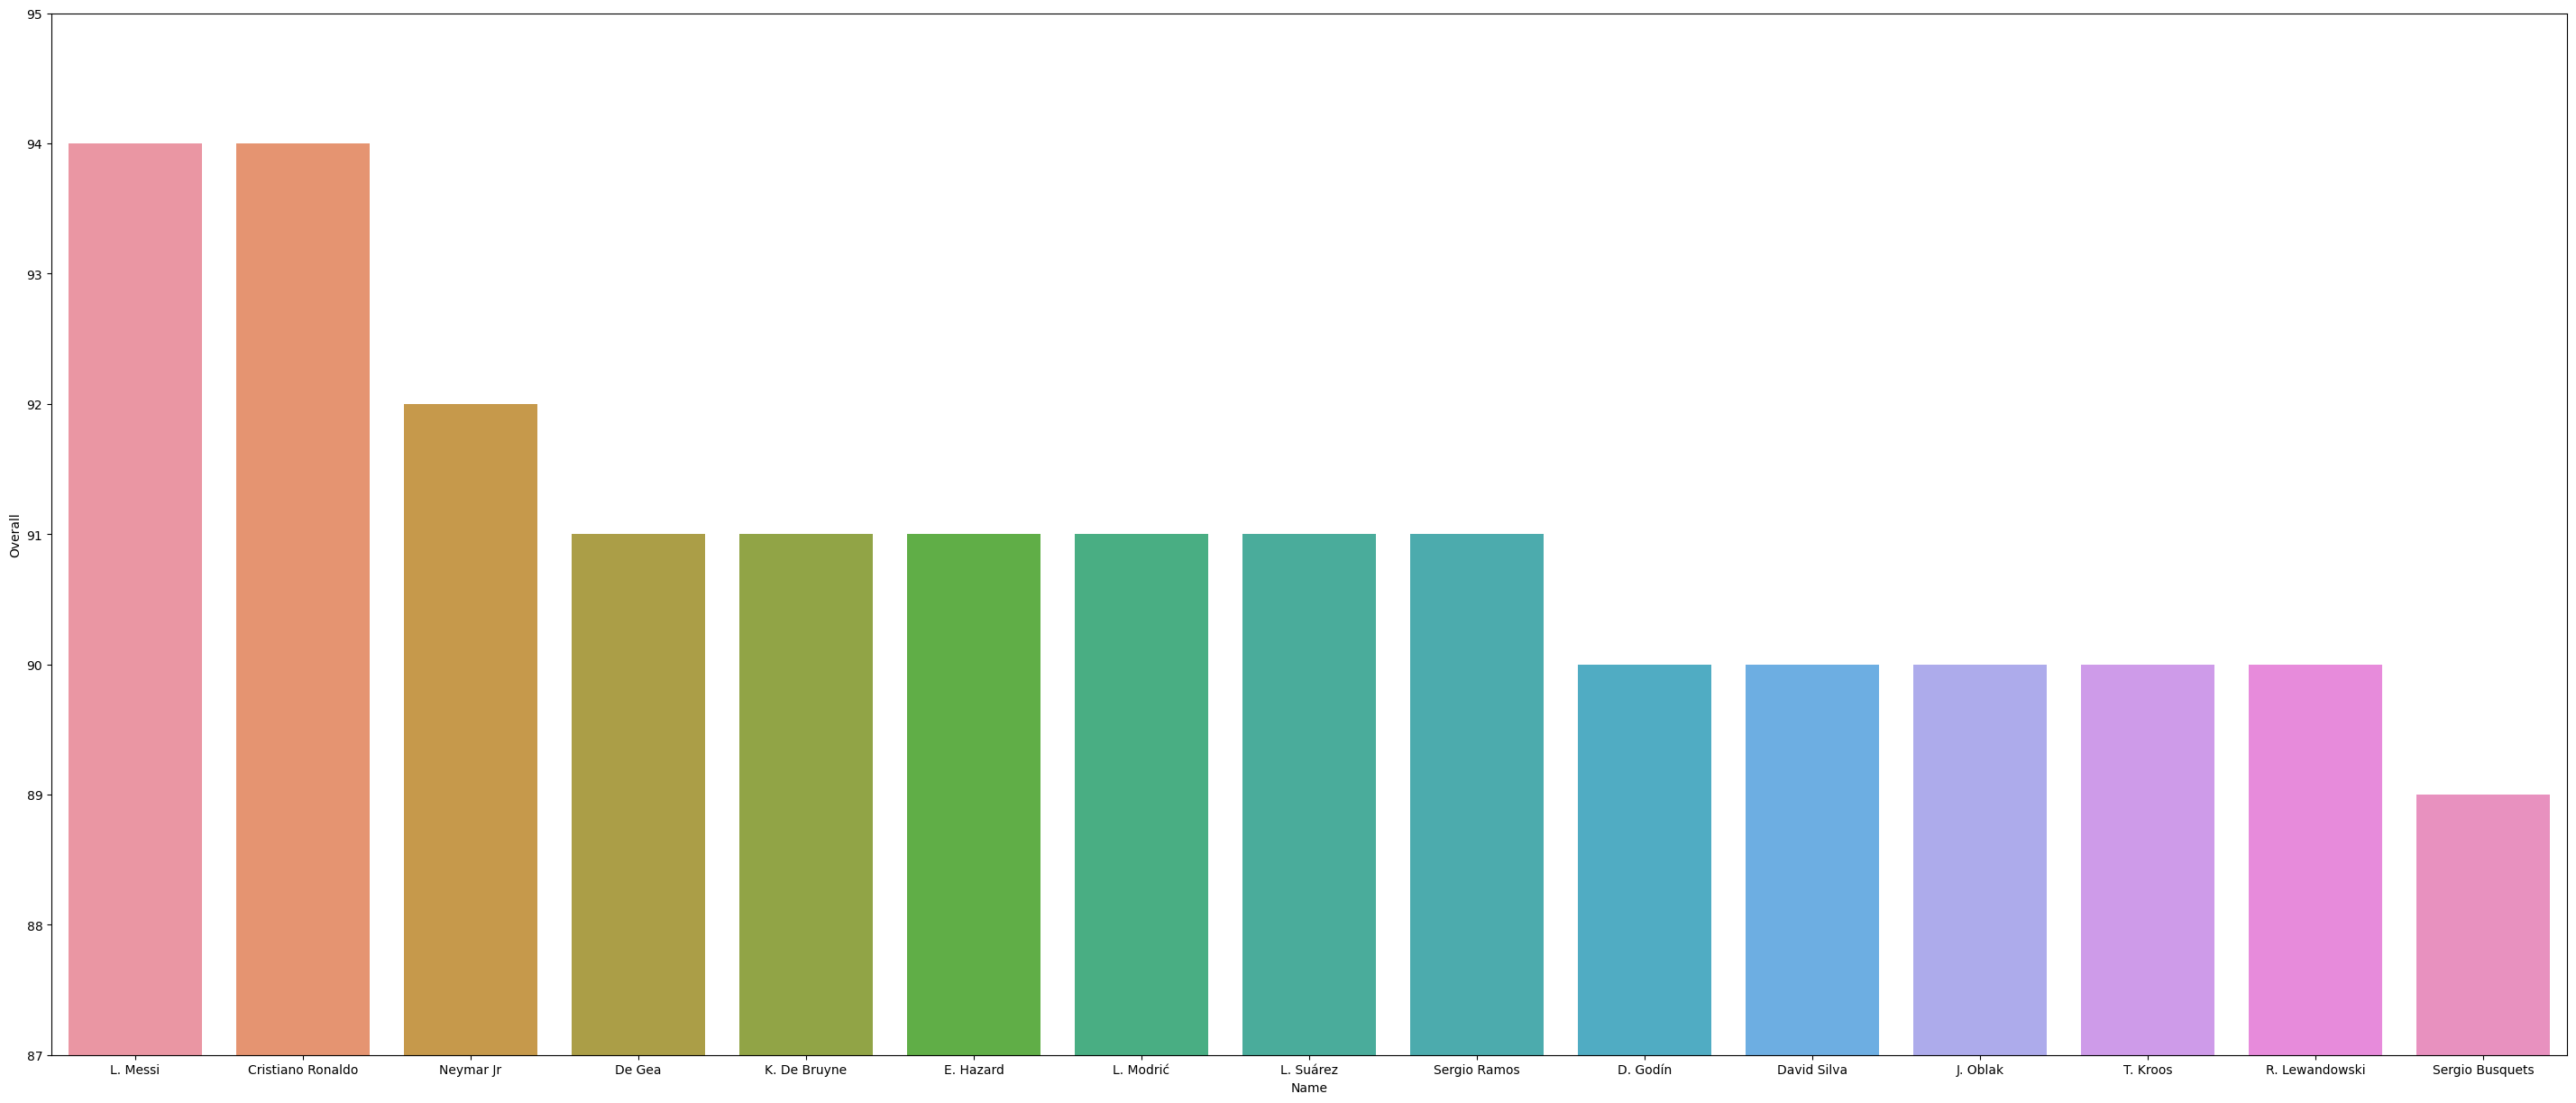

In [29]:
# lets plot the overall ratings of the top players

plt.figure(1, figsize=(36, 15))
sns.barplot(x='Name', y='Overall', data=df_topplayers)

plt.ylim(87, 95)
plt.show() 

Clubs with the best overall players in terms of ratings

In [31]:
bestplayers = {}

for club in data['Club'].unique():
    overallrating = data['Overall'][data['Club'] == club].sum()
    bestplayers[club] = overallrating
    
df_bsp = pd.DataFrame.from_dict(bestplayers, orient='index', columns=['Overall'])

df_bsp['club'] =df_bsp.index
df_bsp = df_bsp.sort_values(by='Overall', ascending=False)

In [32]:
df_bsp

,Overall,club
Real Madrid,2582,Real Madrid
FC Barcelona,2575,FC Barcelona
Manchester United,2549,Manchester United
Chelsea,2534,Chelsea
Manchester City,2532,Manchester City
...,...,...
Bray Wanderers,1234,Bray Wanderers
Sligo Rovers,1076,Sligo Rovers
Limerick FC,1036,Limerick FC
Derry City,1004,Derry City


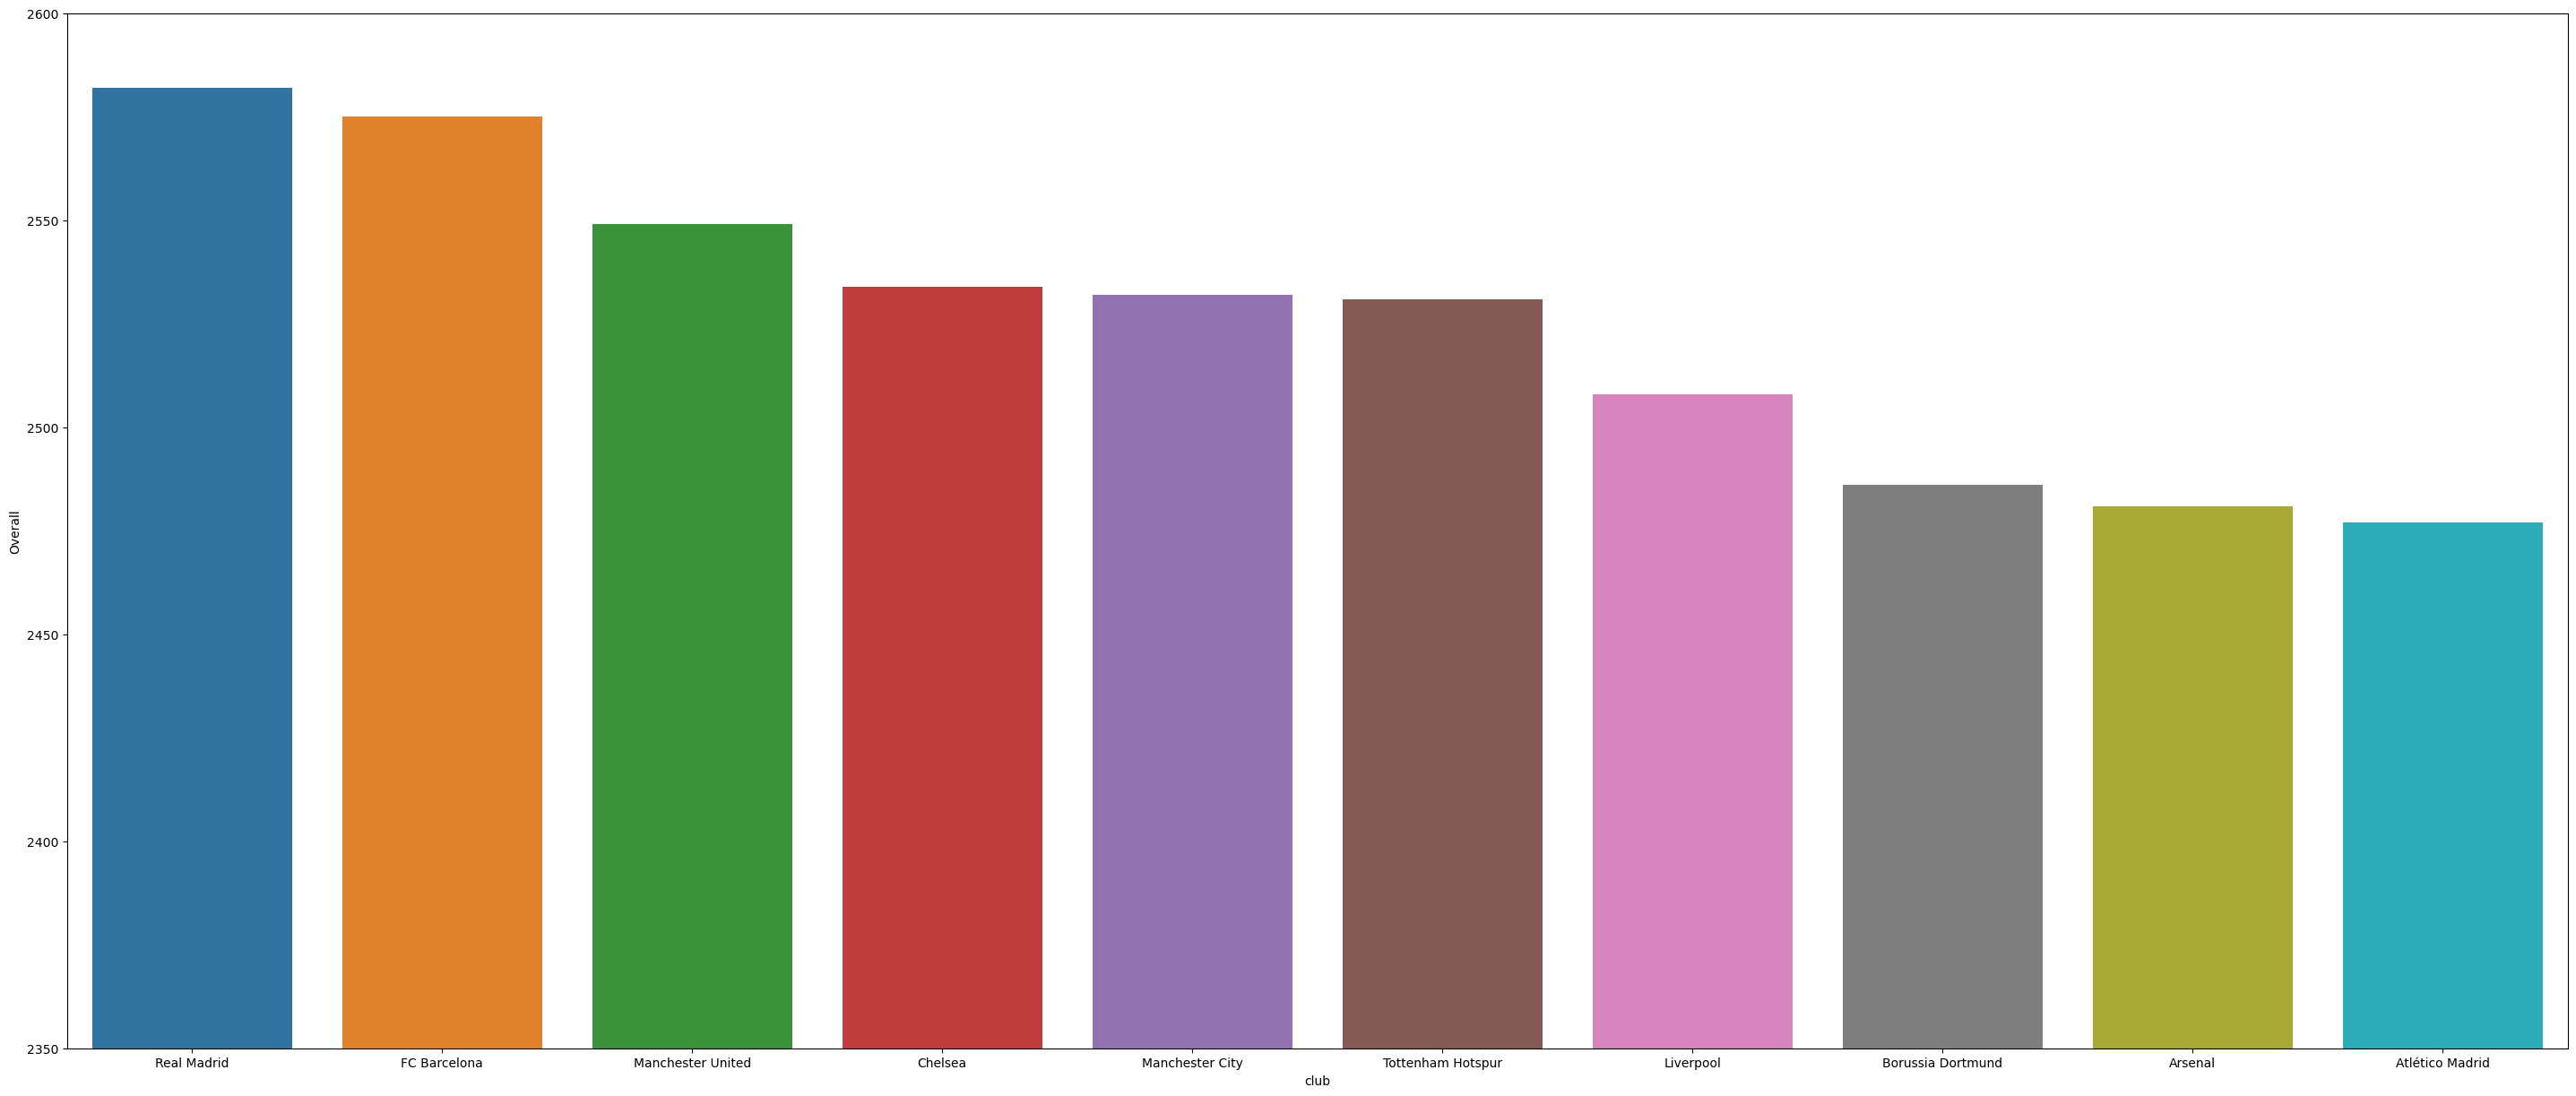

In [33]:
# barplot of the best clubs

plt.figure(1, figsize=(36, 15))
sns.barplot(x='club', y='Overall', data=df_bsp.head(10))
plt.ylim(2350, 2600)
plt.show()

Countries with best overall players ratings

In [34]:
bestplayers = {}

for club in data['Nationality'].unique():
    overallrating = data['Overall'][data['Nationality'] == club].sum()
    bestplayers[club] = overallrating
    
df_bsp = pd.DataFrame.from_dict(bestplayers, orient='index', columns=['Overall'])

df_bsp['Nationality'] =df_bsp.index
df_bsp = df_bsp.sort_values(by='Overall', ascending=False)

In [35]:
df_bsp

,Overall,Nationality
England,105420,England
Germany,79172,Germany
Spain,74717,Spain
Argentina,64252,Argentina
France,61968,France
...,...,...
Malta,61,Malta
Belize,60,Belize
South Sudan,60,South Sudan
Indonesia,56,Indonesia


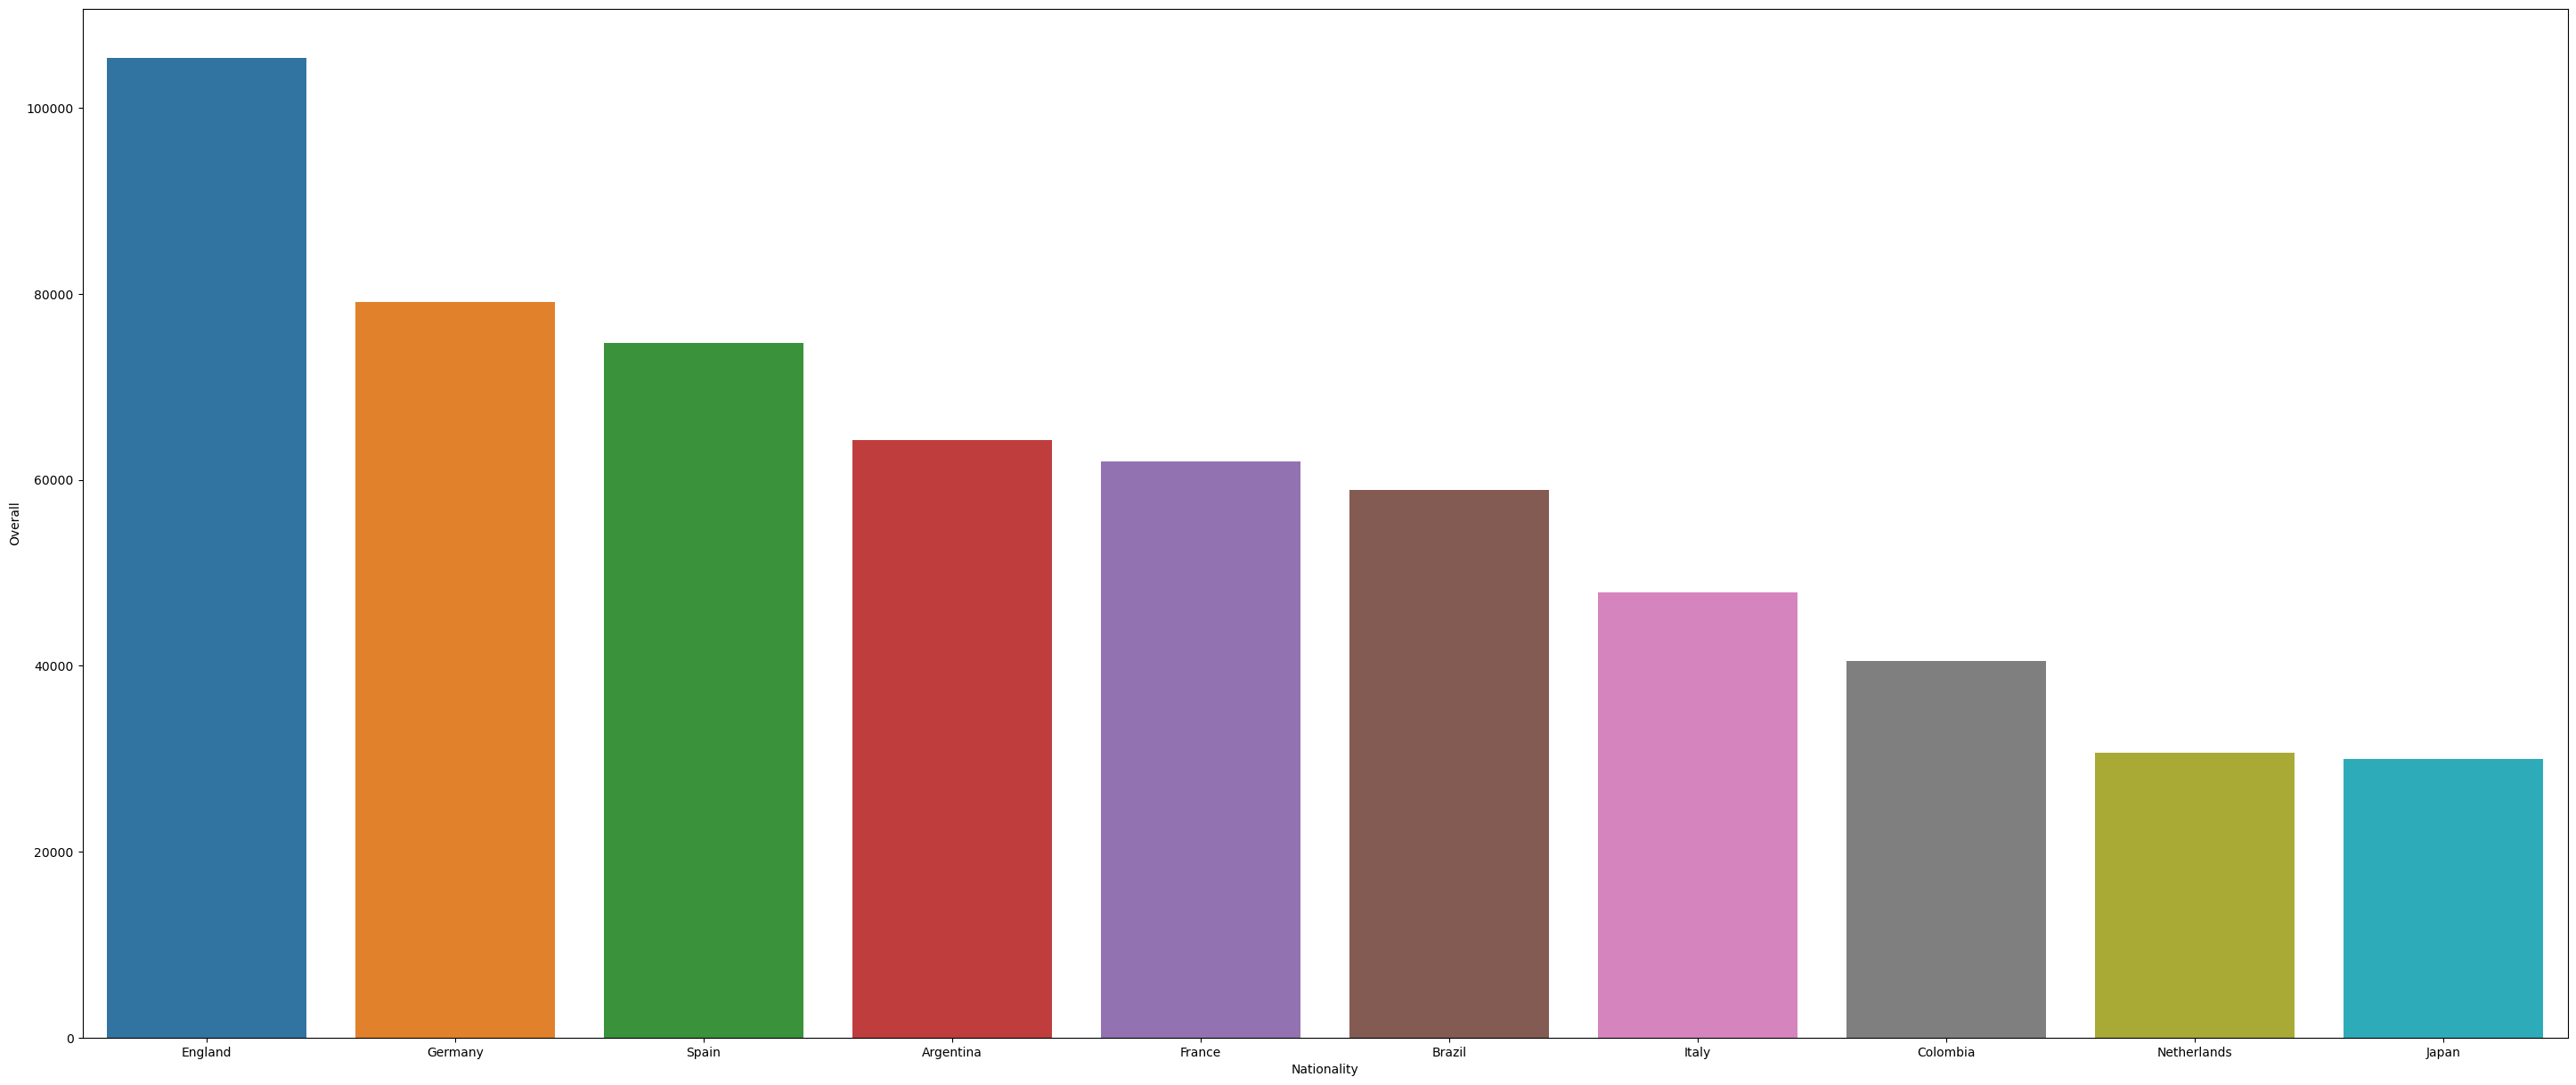

In [37]:
# barplot of the best clubs

plt.figure(1, figsize=(36, 15))
sns.barplot(x='Nationality', y='Overall', data=df_bsp.head(10))

plt.show()

#### Player Abilities Analysis

In [38]:
data.head(1)

,Name,Age,Overall,Nationality,Flag,LongPassing,Club,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Position,Crossing,Volleys,HeadingAccuracy,ShortPassing,FKAccuracy,Finishing,Curve,Dribbling
0,L. Messi,31,94,Argentina,https://cdn.sofifa.org/flags/52.png,87.0,FC Barcelona,96.0,91.0,86.0,91.0,95.0,95.0,85.0,68.0,72.0,59.0,94.0,48.0,22.0,94.0,94.0,75.0,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,RF,84.0,86.0,70.0,90.0,94.0,95.0,93.0,97.0


In [46]:
abilities =['Crossing', 'Finishing', 'HeadingAccuracy', 'ShortPassing',
            'Volleys', 'Dribbling', 'Curve', 'FKAccuracy', 'LongPassing',
            'BallControl', 'Acceleration', 'SprintSpeed', 'Agility', 'Reactions',
            'Balance', 'ShotPower', 'Jumping', 'Stamina', 'Strength', 'LongShots',
            'Aggression', 'Interceptions', 'Positioning', 'Vision', 'Penalties',
            'Composure', 'Marking', 'StandingTackle', 'SlidingTackle', 'GKDiving',
            'GKHandling', 'GKKicking', 'GKPositioning', 'GKReflexes'
    
]

Players with most shot Power

In [41]:
data.sort_values(by='ShotPower', ascending=False)[['Name', 'Club', 'Nationality', 'ShotPower',
                                                   'Overall']].head()

,Name,Club,Nationality,ShotPower,Overall
1,Cristiano Ronaldo,Juventus,Portugal,95.0,94
378,Hulk,Shanghai SIPG FC,Brazil,94.0,81
1348,F. Guarín,Shanghai Greenland Shenhua FC,Colombia,93.0,76
890,L. Podolski,Vissel Kobe,Germany,92.0,78
36,G. Bale,Real Madrid,Wales,92.0,88


best player with long pass

In [42]:
data.sort_values(by='LongPassing', ascending=False)[['Name', 'Club', 'Nationality', 'ShotPower',
                                                   'Overall']].head()

,Name,Club,Nationality,ShotPower,Overall
11,T. Kroos,Real Madrid,Germany,87.0,90
4,K. De Bruyne,Manchester City,Belgium,91.0,91
45,P. Pogba,Manchester United,France,90.0,87
53,I. Rakitić,FC Barcelona,Croatia,84.0,87
219,Cesc Fàbregas,Chelsea,Spain,77.0,83


Best player with Vision

In [43]:
data.sort_values(by='Vision', ascending=False)[['Name', 'Club', 'Nationality', 'ShotPower',
                                                   'Overall']].head()

,Name,Club,Nationality,ShotPower,Overall
0,L. Messi,FC Barcelona,Argentina,85.0,94
4,K. De Bruyne,Manchester City,Belgium,91.0,91
76,Iniesta,Vissel Kobe,Spain,65.0,86
13,David Silva,Manchester City,Spain,72.0,90
6,L. Modrić,Real Madrid,Croatia,79.0,91


best ability to have according to position

In [44]:
data['Position'].value_counts()

ST     2152
GK     2025
CB     1778
CM     1394
LB     1322
RB     1291
RM     1124
LM     1095
CAM     958
CDM     948
RCB     662
LCB     648
LCM     395
RCM     391
LW      381
RW      370
RDM     248
LDM     243
LS      207
RS      203
RWB      87
LWB      78
CF       74
LAM      21
RAM      21
RF       16
LF       15
Name: Position, dtype: int64

In [47]:
positiondf = pd.DataFrame()
for positionname, features in data.groupby(data['Position'])[abilities].mean().iterrows():
    top_features = dict(features.nlargest(5))
    positiondf[positionname] = tuple(top_features)
    
positiondf.head()

,CAM,CB,CDM,CF,CM,GK,LAM,LB,LCB,LCM,LDM,LF,LM,LS,LW,LWB,RAM,RB,RCB,RCM,RDM,RF,RM,RS,RW,RWB,ST
0,Balance,Strength,Stamina,Agility,Balance,GKReflexes,Agility,SprintSpeed,Strength,Stamina,Stamina,Balance,Acceleration,SprintSpeed,Acceleration,SprintSpeed,Agility,SprintSpeed,Strength,Stamina,Stamina,Agility,Acceleration,SprintSpeed,Acceleration,SprintSpeed,SprintSpeed
1,Agility,Jumping,Aggression,Balance,ShortPassing,GKDiving,Balance,Acceleration,Jumping,ShortPassing,ShortPassing,Agility,SprintSpeed,Strength,SprintSpeed,Acceleration,Balance,Stamina,Jumping,ShortPassing,ShortPassing,Acceleration,SprintSpeed,Strength,SprintSpeed,Acceleration,Strength
2,Acceleration,StandingTackle,Strength,Acceleration,Agility,GKPositioning,SprintSpeed,Stamina,StandingTackle,Balance,Strength,Acceleration,Agility,Acceleration,Agility,Stamina,Acceleration,Acceleration,Aggression,Agility,Aggression,Balance,Agility,Acceleration,Agility,Stamina,Acceleration
3,SprintSpeed,Aggression,ShortPassing,SprintSpeed,Stamina,GKHandling,Acceleration,Balance,Aggression,Agility,Aggression,Dribbling,Balance,ShotPower,Balance,Agility,SprintSpeed,Balance,StandingTackle,Balance,Strength,BallControl,Balance,Agility,Balance,Agility,Jumping
4,BallControl,HeadingAccuracy,Jumping,Dribbling,Acceleration,GKKicking,Dribbling,Agility,HeadingAccuracy,BallControl,BallControl,BallControl,Dribbling,Positioning,Dribbling,Balance,Dribbling,Jumping,HeadingAccuracy,BallControl,Jumping,SprintSpeed,Dribbling,ShotPower,Dribbling,Balance,Finishing
